In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer

## Parameters

In [2]:
nr_particles = 10**0
nr_steps = 1*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1.0 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]
observer_substeps = np.array([True, True, True]) #np.array([True, True, True])
mean_free_path = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12])  # [m]
observer_spheres = np.array([-1.0]) # np.array([1.0*10**16, 1.0*10**17, 1.0*10**18, 1.0*10**19, 1.0*10**20]) # np.array([-1.0]) is just a time evolution observer

## Simulation setup

In [3]:
sim = Simulation()

source = Source(gyro_radius, mean_free_path, source_pos, nr_particles)
sim.add_source(source)

observer = Observer(observer_substeps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source
observer
s1 =  2886751345.948129
s2 =  2886751263.54652
s1 =  2886751124.5799694
s2 =  2886751286.515344
s1 =  2886751013.2766376
s2 =  2886751383.909658
s1 =  2886751423.077856
s2 =  2886751304.7920895
s1 =  2886751533.693729
s2 =  2886751365.497214
s1 =  2886751728.891998
s2 =  2886751387.0852594
s1 =  2886752069.2644444
s2 =  2886751310.8741612
s1 =  2886750743.7603164
s2 =  2886751310.6211715
s1 =  2886751368.8472724
s2 =  2886751405.6307483
s1 =  2886751118.111159
s2 =  2886751405.569633
s1 =  2886751775.253327
s2 =  2886751314.014462
s1 =  2886751422.308858
s2 =  2886751264.8040104
s1 =  2886750933.0474677
s2 =  2886751295.6667514
s1 =  2886751691.991554
s2 =  2886751315.911785
s1 =  2886749679.4735885
s2 =  2886751305.5362115
s1 =  2886752720.8294363
s2 =  2886751331.790375
s1 =  2886749991.4135103
s2 =  2886751362.9096756
s1 =  2886749672.6878686
s2 =  2886751306.1530623
s1 =  2886750347.898692
s2 =  2886751333.4717627
s1 =  2886750217.1313815
s2 =  2886

s1 =  2886752429.11081
s2 =  2886751376.287834
s1 =  2886752804.446257
s2 =  2886751431.969464
s1 =  2886750714.928585
s2 =  2886751369.90365
s1 =  2886752824.010964
s2 =  2886751402.455018
s1 =  2886750976.8958497
s2 =  2886751356.1727986
s1 =  2886749055.505935
s2 =  2886751332.714254
s1 =  2886750519.6680336
s2 =  2886751432.9933157
s1 =  2886751640.4602385
s2 =  2886751345.7985587
s1 =  2886751756.9225326
s2 =  2886751307.471076
s1 =  2886751747.2411027
s2 =  2886751323.7206507
s1 =  2886751557.599718
s2 =  2886751339.704466
s1 =  2886750700.8701305
s2 =  2886751297.259011
s1 =  2886752404.0851574
s2 =  2886751330.644038
s1 =  2886751612.08191
s2 =  2886751386.4982085
s1 =  2886751635.2285395
s2 =  2886751338.134771
s1 =  2886751507.3148513
s2 =  2886751392.8388286
s1 =  2886751424.2933216
s2 =  2886751414.195469
s1 =  2886751294.626035
s2 =  2886751350.317531
s1 =  2886751331.2787786
s2 =  2886751352.577849
s1 =  2886751571.1098394
s2 =  2886751260.7890534
s1 =  2886751157.016283


CPU times: user 2.39 s, sys: 95.9 ms, total: 2.48 s
Wall time: 2.39 s


In [4]:
class Vizualizer():
    def __init__(self, df):
        print('init vizualizer')
        self.df = df
        
    def get_particle_ids(self):
        return list(map(int, (set(self.df['id']))))
        
    def plot_trajectory(self, x, y, c, particle_ids, n, file_name):
        if isinstance(particle_ids, int):
            # create a list if only one id was passed to particle_ids
            particle_ids = [particle_ids]
        plt.figure(figsize=(4.5,4))
        for particle_id in particle_ids:
            # filter the pandas dataframe for data of the current particle_id
            df_ids = self.df[self.df['id'] == particle_id]
            plt.scatter(df_ids[x][:n], df_ids[y][:n], s = 4, c=df_ids[c][:n], cmap='viridis')
        # plot colorbar next to plot
        cbar = plt.colorbar()
        cbar.set_label(c + ' [m]')
        plt.tight_layout()
        plt.xlabel(x + ' [m]')
        plt.ylabel(y + ' [m]')
        plt.tight_layout()
        if file_name is not None:
            plt.savefig(file_name)
        plt.show()
        
    def plot_trjectory_substeps(self, particle_ids):
        #n = 35
        n = 10
        if isinstance(particle_ids, int):
            # create a list if only one id was passed to particle_ids
            particle_ids = [particle_ids]
        for particle_id in particle_ids:
            # filter the pandas dataframe for data of the current particle_id
            df_ids = self.df[self.df['id'] == particle_id][:n]
            x = df_ids['x']
            y = df_ids['y']
            plt.plot(x,y,c='orange')
            plt.scatter(x,y,c='orange')
            plt.figure(figsize=(4,4))
            df_phi = df_ids[df_ids['step'] == 0.0]
            df_rho = df_ids[df_ids['step'] == 1.0]
            x_0 = df_phi['x']
            y_0 = df_phi['y']
            x_1 = df_rho['x']
            y_1 = df_rho['y']
            #x_phi = np.vstack([x_0[:-2],x_1[:-2]])
            #y_phi = np.vstack([y_0[:-2],y_1[:-2]])
            #x_rho = np.vstack([x_1[:-2],x_0[2:]])
            #y_rho = np.vstack([y_1[:-2],y_0[2:]])
            #plt.plot([0], [0], 'r', ls='--', label='move in $\phi$')
            #plt.plot([0], [0], 'b', ls=':', label='move in $\\rho$')
            #plt.plot(x_phi,y_phi, 'r', ls='--')
            #plt.plot(x_rho,y_rho, 'b', ls=':')
            plt.scatter(x_0, y_0, c='r', marker='^', s=15, label='after phi')
            plt.scatter(x_1, y_1, c='green', marker='d', s=15, label='after rho')
            #plt.scatter(df['x'].tolist()[8], df['y'].tolist()[8], c='r', s=15, label='change in $\phi$')
            #plt.scatter(df['x'].tolist()[28], df['y'].tolist()[28], c='b', s=15, label='change in $\\rho$')
            #plt.scatter([df_ids['x'].tolist()[0]], [df_ids['y'].tolist()[0]], c='orange', s=25, label='start')
            #plt.plot(df_ids['x'].tolist()[0:n:2], df_ids['y'].tolist()[0:n:2], color='k', label='effective trajectory')
        #plt.scatter(df['x'][:n], df['y'][:n], s= 4)
        #plt.plot(df['x'][:n], df['y'][:n])
        #plt.plot(df['x'][n-1:2*n], df['y'][n-1:2*n], color='k')
        plt.xlabel('x [m]')
        plt.ylabel('y [m]')
        plt.legend()
        plt.axis('square')
        plt.tight_layout()
        #plt.savefig('single_trajectory_detailed.pdf')
        plt.show()

init vizualizer


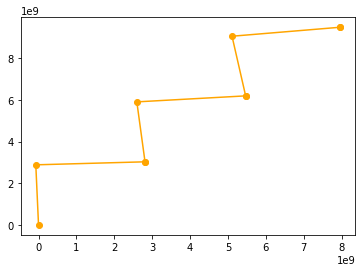

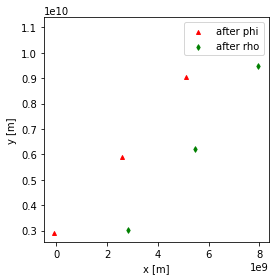

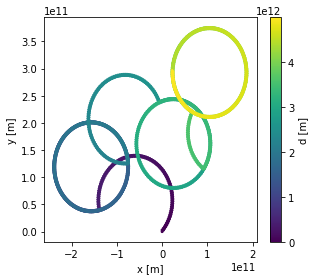

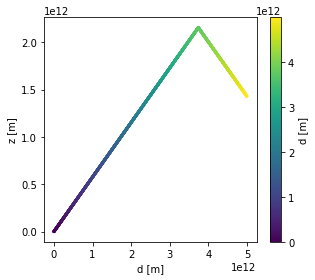

In [5]:
df = pd.read_pickle("data.pkl")

df_time_evolution_observer = df.loc[df['radius'] == -1.0]
vis = Vizualizer(df_time_evolution_observer)
particle_ids = vis.get_particle_ids()
vis.plot_trjectory_substeps(particle_ids[0])
vis.plot_trajectory('x', 'y', 'd', particle_ids[:], -1, None)
vis.plot_trajectory('d', 'z', 'd', particle_ids[:], -1, None)

In [8]:
df_ids = df[df['id'] == 0]
df_ids

,id,i,d,x,y,z,radius,step
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.0,NaN
1,0.0,2.0,6.666666e+09,2.594650e+09,5.908776e+09,2.886751e+09,-1.0,0.0
2,0.0,2.0,8.333333e+09,5.466976e+09,6.197000e+09,2.886751e+09,-1.0,1.0
3,0.0,2.0,1.000000e+10,5.466976e+09,6.197000e+09,5.773502e+09,-1.0,2.0
4,0.0,10.0,4.666667e+10,1.789440e+10,3.405724e+10,2.598076e+10,-1.0,0.0
...,...,...,...,...,...,...,...,...
2996,0.0,9980.0,4.988852e+13,-4.407934e+11,-9.423448e+11,4.996934e+12,-1.0,1.0
2997,0.0,9980.0,4.989018e+13,-4.407934e+11,-9.423448e+11,4.999821e+12,-1.0,2.0
2998,0.0,9990.0,4.993681e+13,-4.433406e+11,-9.807323e+11,5.025802e+12,-1.0,0.0
2999,0.0,9990.0,4.993847e+13,-4.459794e+11,-9.819029e+11,5.025802e+12,-1.0,1.0
